In [22]:
import os
import struct
import numpy as np
import pandas as pd
import sklearn.datasets
import ipyvolume as ipv
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from ipywidgets import ColorPicker, VBox, \
    interact, interactive, fixed

In [23]:
def compute_bic(kmeans,x):

    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    m = kmeans.n_clusters
    n = np.bincount(labels)
    N, d = x.shape
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(x[np.where(labels == i)], [centers[0][i]], 
             'euclidean')**2) for i in range(m)])
    const_term = 0.5 * m * np.log(N) * (d+1)
    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)

In [24]:
url = 'https://raw.githubusercontent.com/MSPawanRanjith/FileTransfer/master/kmean_dataset.csv'
df = pd.read_csv(url, error_bad_lines=False)
df.head(10)

,0,1,2
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
5,5.4,3.9,1.7
6,4.6,3.4,1.4
7,5.0,3.4,1.5
8,4.4,2.9,1.4
9,4.9,3.1,1.5


In [25]:
x = df.iloc[:, [0,1,2]].values
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 4 1 2 4 4 4 2 4 2 2 4 2 4 2 4 4 2 4 2 4 2 4 4
 4 4 4 1 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 1 4 3 1 1 3 2 3 1 3 1
 1 1 4 4 1 1 3 3 4 1 4 3 4 1 3 4 4 1 3 3 3 1 4 1 3 1 1 4 1 1 1 4 1 1 1 4 1
 1 4]


array([[5.006     , 3.428     , 1.462     ],
       [6.57777778, 3.05555556, 5.45555556],
       [5.508     , 2.6       , 3.908     ],
       [7.475     , 3.125     , 6.3       ],
       [6.14444444, 2.83888889, 4.72222222]])

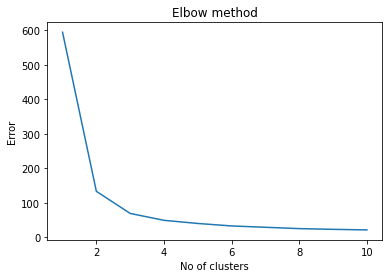

In [26]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [27]:
print("the rapid changes are made between 2 and 4. so we take the average value for k as 3 and proceed")

the rapid changes are made between 2 and 4. so we take the average value for k as 3 and proceed


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


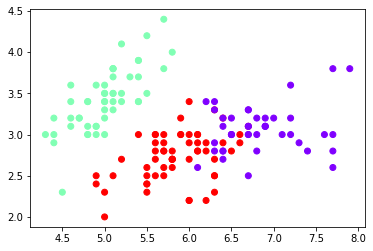

In [28]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_
plt.scatter(x[:,0],x[:,1], c=y_kmeans3,cmap='rainbow')

In [29]:
print("BIC FUNCTION TO FIND THE VALUES OF BIC")

BIC FUNCTION TO FIND THE VALUES OF BIC


In [30]:
ks = range(1,9)
KMeans = [cluster.KMeans(n_clusters = i, init="k-means++").fit(x) for i in ks]
BIC = [compute_bic(kmeansi,x) for kmeansi in KMeans]
print(BIC)
print (max(BIC))
print("the optimum value for k using BIC is",BIC.index(max(BIC))+1)

[-711.3188522095594, -482.5398990071221, -411.6283213921009, -380.8575173003059, -373.70503045378655, -373.34594503736724, -366.56856621541596, -380.2520586100021]
-366.56856621541596
the optimum value for k using BIC is 7


Text(0, 0.5, '# BIC')

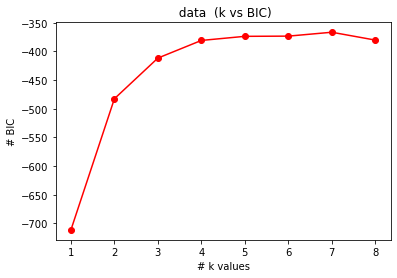

In [31]:
plt.plot(ks,BIC,'r-o')
plt.title(" data  (k vs BIC)")
plt.xlabel("# k values")
plt.ylabel("# BIC")